<a href="https://colab.research.google.com/github/kingspy89/ml_learnings-/blob/main/standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # data processing
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df= df.iloc[:,2:]

The code `df = df.iloc[:, 2:]` selects all rows and columns from index 2 onwards, effectively dropping the first two columns of the DataFrame. In this case, it means dropping the 'Gender' and 'User ID' columns, keeping only 'Age', 'EstimatedSalary', and 'Purchased'.

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
140,19,85000,0
81,39,42000,0
303,37,79000,1
185,31,66000,0
124,41,51000,0


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [11]:
x_train,y_train

(     Age  EstimatedSalary
 92    26            15000
 223   60           102000
 234   38           112000
 232   40           107000
 377   42            53000
 ..   ...              ...
 323   48            30000
 192   29            43000
 117   36            52000
 47    27            54000
 172   26           118000
 
 [280 rows x 2 columns],
 92     0
 223    1
 234    0
 232    1
 377    0
       ..
 323    1
 192    0
 117    0
 47     0
 172    0
 Name: Purchased, Length: 280, dtype: int64)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Create an instance of the scaler

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [24]:
x_train_scaled = pd.DataFrame(x_train_scaled)

In [26]:
x_train_scaled

,0,1
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [29]:
np.round(x_train_scaled.describe(),1)

,0,1
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Text(0.5, 1.0, 'After Scaling')

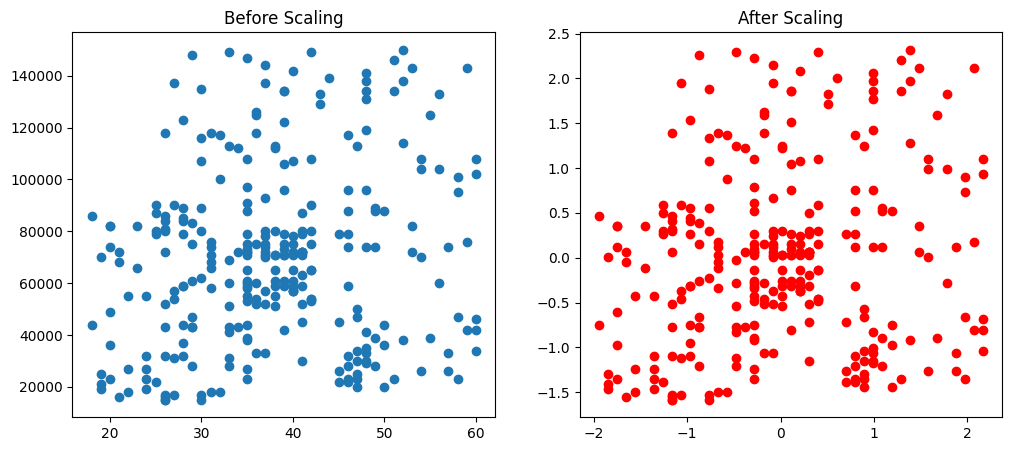

In [33]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled[0], x_train_scaled[1],color='red')
ax2.set_title("After Scaling")

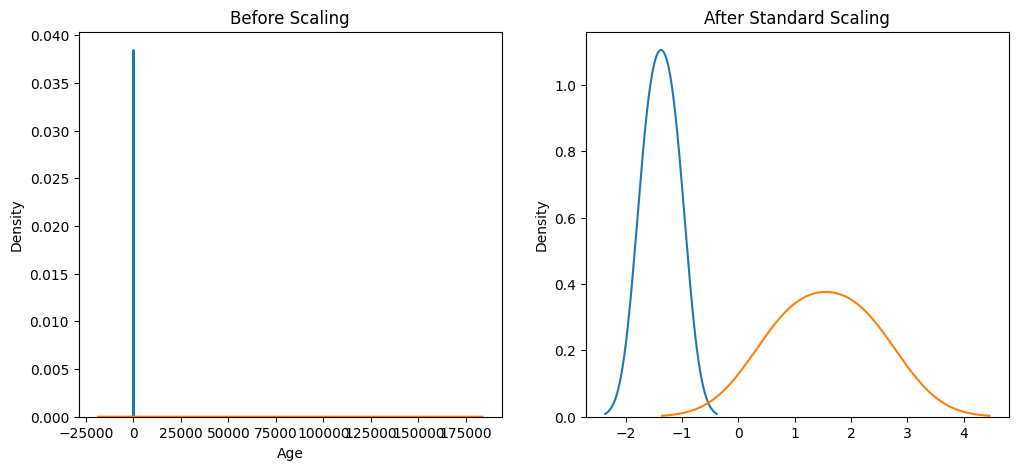

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled[0], ax=ax2)
sns.kdeplot(x_train_scaled[1], ax=ax2)
plt.show()